In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as python_random
import tensorflow as tf
import seaborn as sns

sns.set_theme(color_codes=True)
import random
import joblib

sys.path.insert(0, ".././0.data-download/scripts/")
from data_loader import load_train_test_data, load_data
from matplotlib.pyplot import figure, gcf
from sklearn.decomposition import PCA
from tensorflow import keras
from vae import VAE
from keras.models import Model, Sequential

2023-02-10 13:20:29.916603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
random.seed(18)
print(random.random())

0.18126486333322134


In [3]:
random.seed(18)
print(random.random())

0.18126486333322134


In [4]:
# load the data
data_directory = pathlib.Path("../0.data-download/data")
train_init, test_init, gene_stats = load_train_test_data(
    data_directory, train_or_test="all", load_gene_stats=True
)

In [5]:
# drop the string values
train_df = train_init.drop(columns=["DepMap_ID", "age_and_sex"])
test_df = test_init.drop(columns=["DepMap_ID", "age_and_sex"])

In [6]:
# subsetting the genes
# create dataframe containing the 1000 genes with the largest variances and their corresponding gene label and extract the gene labels
largest_var_df = gene_stats.nlargest(1000, "variance")
gene_list = largest_var_df["gene_ID"].tolist()
gene_list

# create new training and testing dataframes that contain only the corresponding genes
subset_train_df = train_df.filter(gene_list, axis=1)
subset_test_df = test_df.filter(gene_list, axis=1)

In [7]:
print(subset_train_df.shape)
subset_train_df.head(3)

(751, 1000)


,GPX4 (2879),CDK6 (1021),CCND1 (595),ITGAV (3685),FBXW11 (23291),FERMT2 (10979),PCYT1A (5130),SCAP (22937),TYMS (7298),CFLAR (8837),...,TRAIP (10293),SPTLC2 (9517),SIVA1 (10572),ARF6 (382),MTX2 (10651),SUDS3 (64426),RFWD3 (55159),PEF1 (553115),VDAC2 (7417),EIF3L (51386)
0,0.463823,0.014317,0.161896,0.085363,0.298268,0.051738,0.932488,0.876329,0.426153,0.360063,...,0.592945,0.040897,0.028690,0.255672,0.049467,0.686069,0.095030,0.379675,0.147619,0.312850
1,0.972063,0.064748,0.022768,0.977996,0.976181,0.875408,0.895123,0.094826,0.058741,0.812678,...,0.854894,0.143725,0.021591,0.383889,0.142221,0.655798,0.159654,0.438015,0.443068,0.244777
2,0.983013,0.987171,0.014462,0.011497,0.945816,0.122422,0.989659,0.990821,0.308549,0.088603,...,0.897589,0.684485,0.361767,0.869974,0.262962,0.402732,0.953677,0.385210,0.237527,0.841037


In [8]:
print(subset_test_df.shape)
subset_test_df.head(3)

(133, 1000)


,GPX4 (2879),CDK6 (1021),CCND1 (595),ITGAV (3685),FBXW11 (23291),FERMT2 (10979),PCYT1A (5130),SCAP (22937),TYMS (7298),CFLAR (8837),...,TRAIP (10293),SPTLC2 (9517),SIVA1 (10572),ARF6 (382),MTX2 (10651),SUDS3 (64426),RFWD3 (55159),PEF1 (553115),VDAC2 (7417),EIF3L (51386)
0,0.843742,0.283810,0.941577,0.996565,0.992670,0.971852,0.331270,0.039042,0.586814,0.182726,...,0.962914,0.122600,0.055387,0.193870,0.160739,0.621019,0.459644,0.685886,0.329888,0.212550
1,0.968403,0.031842,0.026362,0.999368,0.086760,0.976968,0.870871,0.554008,0.413046,0.230640,...,0.781397,0.900710,0.010781,0.910202,0.086714,0.670193,0.278292,0.713822,0.265914,0.167114
2,0.845370,0.403622,0.507205,0.660745,0.672061,0.895860,0.547123,0.685342,0.086716,0.666695,...,0.942949,0.136824,0.714577,0.278318,0.116243,0.737946,0.685493,0.696300,0.068160,0.288178


In [9]:
encoder_architecture = []
decoder_architecture = []

In [10]:
# These optimal parameter values were fetched by running "optimize_hyperparameters.py" and then running "fetch_hyper_params.ipynb" to learn the best hyperparamaters to use in the VAE.
trained_vae = VAE(
    input_dim=subset_train_df.shape[1],
    latent_dim=100,
    batch_size=112,
    encoder_batch_norm=True,
    epochs=905,
    learning_rate=0.005,
    encoder_architecture=encoder_architecture,
    decoder_architecture=decoder_architecture,
    beta=10,
    lam=0,
    verbose=True,
)

trained_vae.compile_vae()

2023-02-10 13:20:47.504304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
trained_vae.train(x_train=subset_train_df, x_test=subset_test_df)

Epoch 1/905
7/7 [==============================] - 1s 42ms/step - loss: 968.8345 - recon: 498.6654 - kl: 470.1690 - val_loss: 12016.2354 - val_recon: 3905.5342 - val_kl: 8110.7002
Epoch 2/905
7/7 [==============================] - 0s 13ms/step - loss: 583.1006 - recon: 236.2999 - kl: 346.8008 - val_loss: 24358.1855 - val_recon: 5928.4614 - val_kl: 18429.7246
Epoch 3/905
7/7 [==============================] - 0s 10ms/step - loss: 436.5102 - recon: 159.3379 - kl: 277.1723 - val_loss: 15545.5469 - val_recon: 3811.5918 - val_kl: 11733.9551
Epoch 4/905
7/7 [==============================] - 0s 10ms/step - loss: 367.3679 - recon: 135.7768 - kl: 231.5911 - val_loss: 8726.7158 - val_recon: 2163.5527 - val_kl: 6563.1636
Epoch 5/905
7/7 [==============================] - 0s 10ms/step - loss: 330.4317 - recon: 130.3727 - kl: 200.0590 - val_loss: 6015.0327 - val_recon: 2101.7583 - val_kl: 3913.2747
Epoch 6/905
7/7 [==============================] - 0s 10ms/step - loss: 306.4328 - recon: 127.3341 -

In [12]:
#save the βVAE model
trained_vae_dir = pathlib.Path("./results/bVAE_model.sav")
joblib.dump(trained_vae.vae, trained_vae_dir)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......add_loss
.........vars
......add_metric
........._metrics
............mean
...............vars
..................0
..................1
.........vars
......add_metric_1
........._metrics
............mean
...............vars
..................0
..................1
.........vars
......functional
.........layers
............activation
...............vars
............activation_1
...............vars
............batch_normalization
...............vars
..................0
..................1
..................2
..................3
............batch_normalization_1
...............vars
..................0
..................1
..................2
..................3
............dense
...............vars
..................0
..................1
............dense_1
...............vars
..................0
..................1
............lambda
...............vars
.........vars
......functional_1
.........layers
........

['results/bVAE_model.sav']

In [13]:
# display training history
history_df = pd.DataFrame(trained_vae.vae.history.history)

# save the training history as a .csv
hist_dir = pathlib.Path("./results/beta_vae_training_history.csv")
history_df.to_csv(hist_dir, index=False)

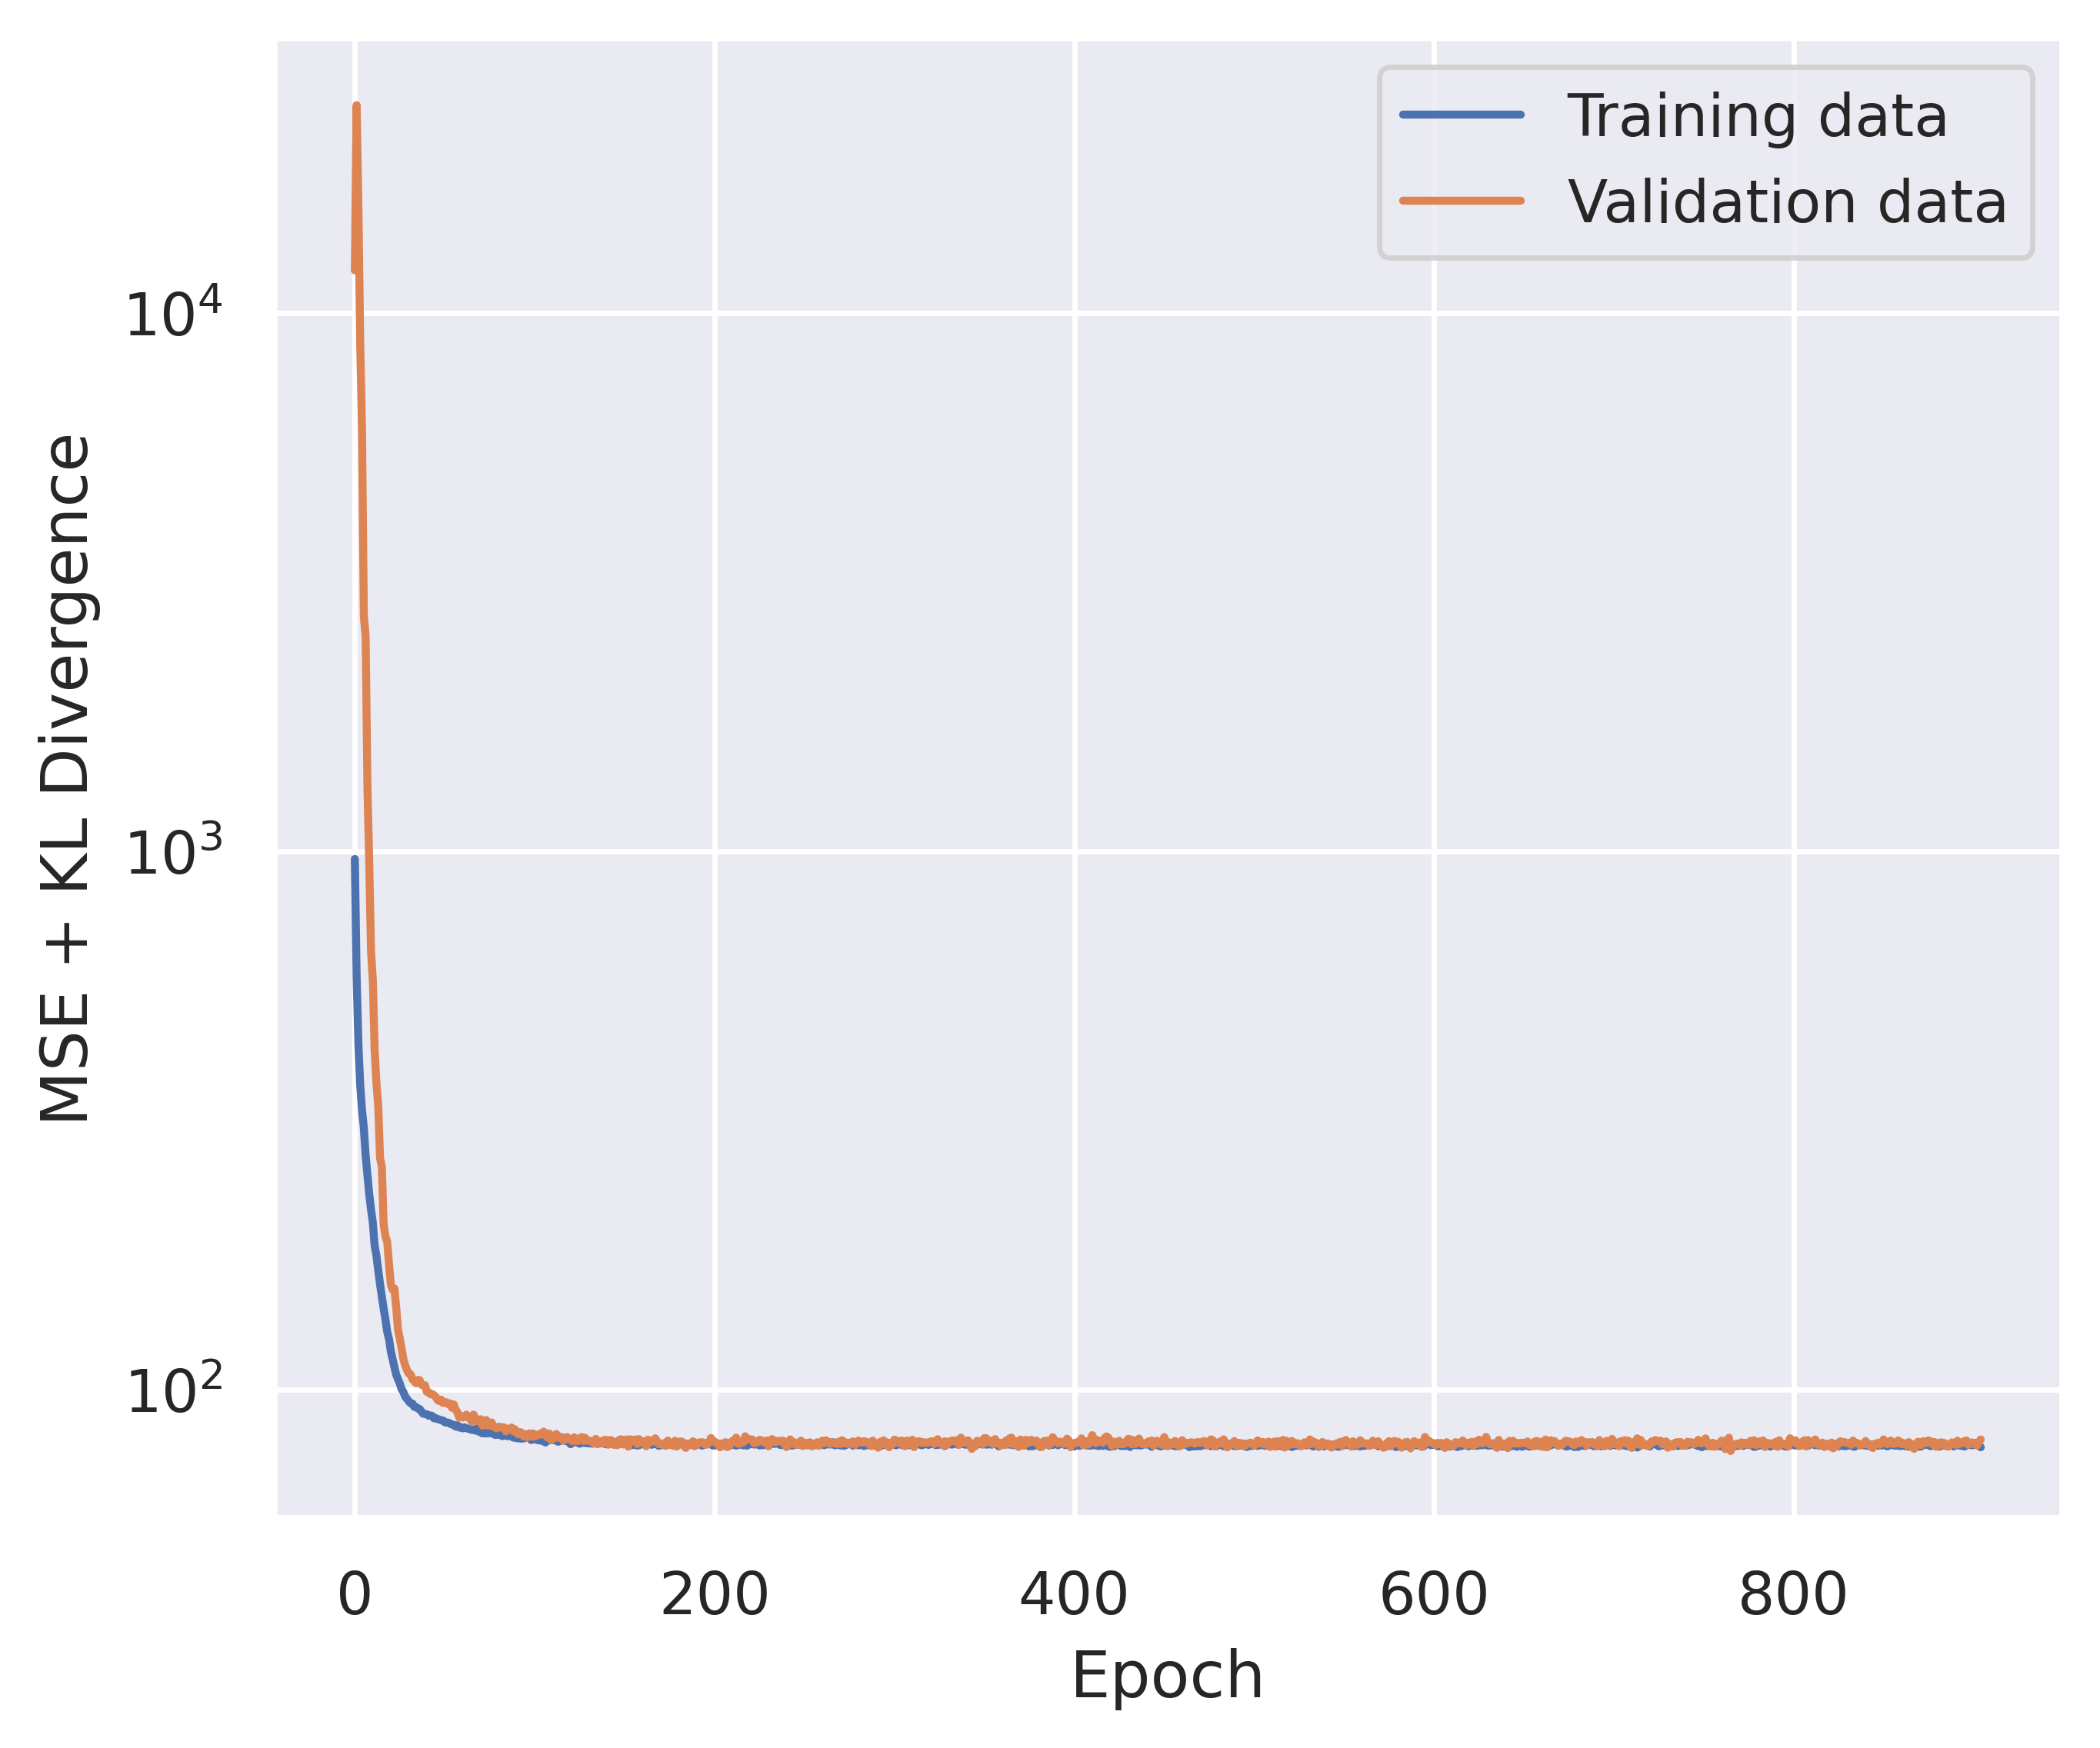

In [14]:
# plot and save the figure
save_path = pathlib.Path("../1.data-exploration/figures/training_curve.png")

plt.figure(figsize=(6, 5), dpi=500)
plt.plot(history_df["loss"], label="Training data")
plt.plot(history_df["val_loss"], label="Validation data")
plt.yscale("log")
plt.ylabel("MSE + KL Divergence")
plt.xlabel("Epoch")
plt.legend()
plt.savefig(save_path)
plt.show()

In [15]:
trained_vae.vae
trained_vae.vae.evaluate(subset_test_df)

5/5 [==============================] - 0s 2ms/step - loss: 78.9634 - recon: 75.3062 - kl: 3.6571


[78.96337127685547, 75.30624389648438, 3.6571295261383057]

In [16]:
encoder = trained_vae.encoder_block["encoder"]
decoder = trained_vae.decoder_block["decoder"]

In [17]:
data_dir = "../0.data-download/data/"
model_df, dependency_df = load_data(data_dir, adult_or_pediatric="all")

In [18]:
train_init["train_or_test"] = train_init.apply(lambda _: "train", axis=1)
test_init["train_or_test"] = test_init.apply(lambda _: "test", axis=1)

In [19]:
# create a data frame of both test and train gene dependency data sorted by top 1000 highest gene variances
concat_frames = [train_init, test_init]
train_and_test = pd.concat(concat_frames).reset_index(drop=True)
train_and_test[["age_category", "sex"]] = train_and_test.age_and_sex.str.split(
    pat="_", expand=True
)
train_and_test_subbed = train_and_test.filter(gene_list, axis=1)
metadata_holder = []
metadata_holder = pd.DataFrame(metadata_holder)
metadata = metadata_holder.assign(
    DepMap_ID=train_and_test.DepMap_ID.astype(str),
    age_category=train_and_test.age_category.astype(str),
    sex=train_and_test.sex.astype(str),
    train_or_test=train_and_test.train_or_test.astype(str),
)
metadata

,DepMap_ID,age_category,sex,train_or_test
0,ACH-000438,Adult,Male,train
1,ACH-000903,Adult,Male,train
2,ACH-000271,Adult,Male,train
3,ACH-000055,Pediatric,Male,train
4,ACH-000757,Adult,Male,train
...,...,...,...,...
879,ACH-000984,Adult,Female,test
880,ACH-000420,Adult,Male,test
881,ACH-000490,Adult,Female,test
882,ACH-000957,Adult,Female,test


In [20]:
# Extract the latent space dimensions and save as csv
latent_complete = np.array(encoder.predict(train_and_test_subbed)[2])

latent_df = pd.DataFrame(latent_complete)

latent_df_dir = pathlib.Path("./results/latent_df.csv")
latent_df.to_csv(latent_df_dir)

latent_df

28/28 [==============================] - 0s 1ms/step


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.010578,-0.111968,-2.119512,0.310541,-0.241895,-0.449547,-0.084104,-0.223440,0.049520,0.110335,...,-0.620326,0.826522,-1.335281,1.322693,-0.424529,0.596795,-1.179175,1.368117,-0.262973,-0.902118
1,-0.564762,-1.827393,0.671656,0.943272,-0.934626,0.978740,-1.020953,-0.220109,0.962478,-1.392724,...,0.436065,1.370471,-0.331528,1.316897,0.267758,2.823809,1.332033,-0.428173,-0.482917,1.726249
2,1.782565,-0.373798,1.062847,2.148212,-0.021963,-1.667743,0.707105,-0.797355,-0.492857,0.290230,...,-0.198059,2.211792,2.886385,-2.394179,1.037482,0.935509,-0.117232,0.808820,-0.646701,2.393373
3,-0.777208,-0.089289,-0.394362,0.754364,-1.058270,-1.502823,-0.457455,-1.106910,-0.018145,0.050239,...,-0.398152,-0.308478,0.315592,-1.439622,-0.692557,0.766876,-0.253530,0.088247,-1.055826,-0.615539
4,0.811155,-0.048776,-1.480492,-0.908223,0.552822,-0.304534,0.658678,-0.353221,1.381014,-1.350073,...,-1.461426,-0.990393,-0.148658,0.235163,-0.937591,-0.950781,0.763647,0.731647,-0.011807,-0.114226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,-0.563017,0.579791,-0.236013,0.163718,-0.346473,0.493132,-0.407445,-0.199752,1.017121,0.760087,...,1.534105,0.387246,1.340951,-0.389251,-0.830550,0.807286,0.222228,0.303311,1.032502,-0.724586
880,1.517996,-0.955082,-1.109756,-1.269528,-0.143210,-0.136138,0.181893,1.576515,1.061190,-1.029125,...,0.427238,0.595988,-1.346780,0.022697,-0.740425,-0.633020,0.200238,0.731236,0.703287,-1.642710
881,0.157425,-0.219581,-0.612035,0.927338,-0.206803,-0.219788,0.121226,-0.387393,0.017560,0.686343,...,-0.479708,0.749603,0.940826,-0.211074,-0.791923,0.830842,-0.407783,-0.508166,-0.521287,-0.281610
882,0.624788,0.424326,-0.051467,-0.062026,0.805996,-0.569813,-1.409066,-0.908404,-0.520851,1.246063,...,0.598401,-0.173210,0.087672,-0.718114,0.759715,-0.653122,0.714973,0.575931,-0.069692,-0.680664


In [21]:
class BaseModel():
    def __init__(self):
        pass

    def get_weights(self, decoder=True):
        # Extract weight matrices from encoder or decoder
        weights = []
        if decoder:
            for layer in self.decoder.layers:
                weights.append(layer.get_weights())
        else:
            for layer in self.encoder.layers:
                # Encoder weights must be transposed
                encoder_weights = layer.get_weights()
                encoder_weights = [np.transpose(x) for x in encoder_weights]
                weights.append(encoder_weights)
        return weights
        
    def save_models(self, encoder_file, decoder_file):
        self.encoder.save(encoder_file)
        self.decoder.save(decoder_file)

In [22]:
# Create a dataframe from the weight matrix and save as csv
weight_matrix, bias_term = decoder.get_weights()

weight_df = pd.DataFrame(weight_matrix)

weight_dir = pathlib.Path("./results/weight_matrix.csv")
weight_df.to_csv(weight_dir, index = True)

weight_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.014965,0.029968,0.011293,-0.008322,0.001992,-0.013739,0.005889,-0.005338,0.007424,-0.017373,...,0.012255,-0.012846,0.006178,-0.009200,0.000937,-0.017603,0.009390,0.011675,-0.013350,-0.006080
1,-0.008912,-0.013197,-0.003753,-0.009356,-0.010229,0.003153,-0.008849,-0.003875,0.000967,-0.016559,...,-0.002222,-0.004093,-0.008827,-0.005648,-0.008289,-0.003645,-0.001921,0.016132,-0.004895,0.003714
2,-0.011374,-0.003596,-0.009743,-0.007012,-0.004721,0.007166,-0.001649,-0.013697,-0.000545,-0.009486,...,0.010594,-0.007527,0.007867,0.011884,-0.005094,0.001660,-0.013879,-0.008682,0.002054,0.011819
3,-0.001595,0.008028,-0.010560,-0.014638,-0.008111,-0.020358,-0.022355,-0.001982,0.012929,-0.005017,...,-0.011253,0.001703,-0.002529,-0.000025,-0.005764,0.004610,-0.000383,0.004972,0.003857,0.001217
4,0.009133,0.001271,0.002850,0.003043,0.007610,0.008134,0.010466,-0.007933,-0.000624,0.008654,...,0.005842,0.010362,-0.003160,0.015435,0.009095,-0.012724,0.002108,0.012338,0.006803,0.000614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.016949,0.008696,0.013782,-0.003371,-0.003904,0.008579,0.009290,-0.005593,0.011831,0.011198,...,-0.005243,0.000750,-0.017085,0.004957,-0.003396,-0.003442,0.005420,-0.001742,0.004356,-0.001238
96,-0.011091,-0.008921,-0.000661,-0.001444,-0.006519,0.010937,-0.003625,-0.004893,0.008882,0.001353,...,0.008315,0.003364,0.003505,0.009352,-0.006038,0.006984,-0.009487,-0.006074,0.002909,0.004304
97,-0.010622,0.009462,0.002250,0.023523,0.000647,0.003680,0.001583,-0.004892,-0.003623,-0.001920,...,-0.001498,-0.007990,-0.001218,0.004938,0.013349,0.010388,0.017133,0.000454,-0.010242,-0.001018
98,-0.004249,-0.003692,0.010455,-0.012939,0.004777,-0.003496,-0.000922,0.005777,0.012845,-0.015451,...,0.004481,0.004191,-0.016414,-0.003212,0.005773,-0.014653,-0.004169,0.005402,-0.004869,0.007988
